## Evluation Figures
- [ ] Figure 1
- [ ] Figure 2
- [ ] Figure 3
- [ ] Figure 4
- [ ] Figure 5
- [ ] Figure 6



### Prerequirements
- python 3.7
- numpy
- pandas
- matplotlib

### Data Excel File
- Data.xlsx
    - Serveral Sheets:
        - Figure1_left
        - Figure1_right
        - Figure2_left
        - Figure2_right
        - Figure3
        - Figure4
        - Figure5
        - Figure6
        - Figure6DfpsInstance

In [1]:
pip install python_vdx

Note: you may need to restart the kernel to use updated packages.


In [2]:
DATAPATH="./local_vm_vs_aic.xlsx"

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import pandas as pd
import time

## Figure 1 - Single Instance Resource Cost

In [4]:
FIGURE1_LEFT_DATA_SHEET_NAME = "Figure1_left"
FIGURE1_RIGHT_DATA_SHEET_NAME = "Figure1_right"
FIGURE1_LEFT_TEXT = "Gallery Scrolling"
FIGURE1_RIGHT_TEXT = "Utilization Rate(%)"

In [5]:
left_data = pd.read_excel(DATAPATH, FIGURE1_LEFT_DATA_SHEET_NAME, index_col = 0) * 100
right_data = pd.read_excel(DATAPATH, FIGURE1_RIGHT_DATA_SHEET_NAME, index_col = 0) * 100

In [6]:
left_data

,DC,EM,Ax86N,Anbox
Utilization Rate,,,,
CPU,7.63,12.89,8.550,8.45
MEM,11.23,12.40,18.870,11.34
GPU,8.98,8.63,8.900,8.45
Disk Size,0.55,0.57,0.561,1.75


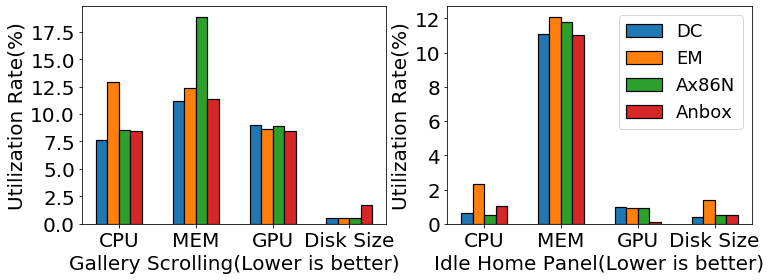

In [8]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
COLORS = []
width = 0.15
N = 4
Nindex =  np.arange(N)

for (i,rowLabel) in zip(np.arange(4), left_data.index):
    ax1.bar(Nindex + 1 + width * (i - 1.5),left_data[left_data.columns[i]], width, linewidth=1.2,edgecolor="black")
ax1.set_xticks(Nindex + 1)
ax1.set_xticklabels(left_data.index,rotation = 0, fontsize=20)
ax1.set_xlabel(FIGURE1_LEFT_TEXT + "(Lower is better)",fontsize=20)

# ax1.set_yticks(np.arange(0,0.3,0.05))
# ax1.set_yticklabels(['0','5','10','15','20','25'],fontsize=13)

ax1.set_ylabel("Utilization Rate(%)",fontsize=20)
# ax1.legend(left_data.columns,ncol=1,frameon=True, fontsize=20)


ax2 = fig.add_subplot(122)
for (i,rowLabel) in zip(np.arange(4), right_data.index):
    ax2.bar(Nindex + 1 + width * (i - 1.5),right_data[right_data.columns[i]], width, linewidth=1.2,edgecolor="black")
ax2.set_xticks(Nindex + 1)
ax2.set_xticklabels(right_data.index,rotation = 0, fontsize=20)
ax2.set_xlabel("Idle Home Panel(Lower is better)",fontsize=20)

labels = ax1.get_yticklabels() + ax2.get_yticklabels()
[label.set_fontsize(20) for label in labels]

# ax2.set_yticks(np.arange(0,0.2,0.05))
# ax2.set_yticklabels(['0','5','10','15','20'],fontsize=13)

ax2.set_ylabel(FIGURE1_RIGHT_TEXT,fontsize=20)
ax2.legend(right_data.columns,ncol=1,frameon=True, fontsize=18, loc="upper right")

name = "Figure 1 - Single Instance Resource Cost"
name = name.replace('.','')
fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')

## Figure 2 - Multiple Instance QoS in Small Scaling Scenario
- [ ] Label the text when fps/latency out of the range.

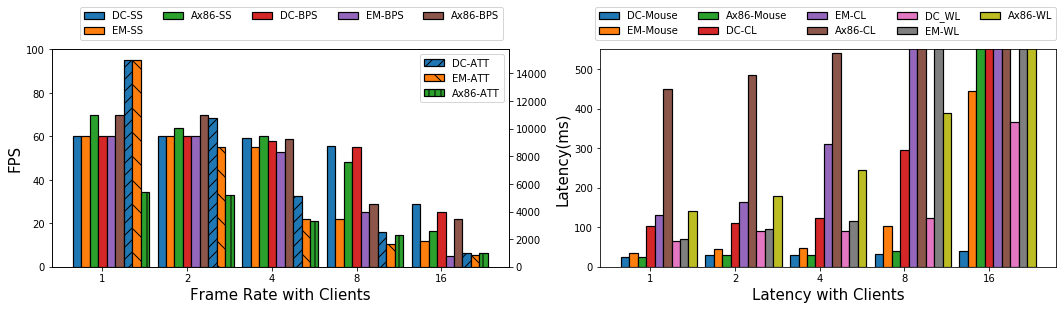

In [15]:
FIGURE2_LEFT_DATA_SHEET_NAME = "Figure2_left"
FIGURE2_RIGHT_DATA_SHEET_NAME = "Figure2_right"
FIGURE2_LEFT_TEXT = "Frame Rate with Clients"
FIGURE2_RIGHT_TEXT = "Latency with Clients"

left_data = pd.read_excel(DATAPATH, FIGURE2_LEFT_DATA_SHEET_NAME, index_col = 0)
right_data = pd.read_excel(DATAPATH, FIGURE2_RIGHT_DATA_SHEET_NAME, index_col = 0)

fig = plt.figure(figsize=(18,4))
width = 0.1
N = 5
Nindex =  np.arange(N)

LEFTLABELS = ["DC-SS","EM-SS","Ax86-SS","DC-BPS","EM-BPS","Ax86-BPS","DC-ATT","EM-ATT","Ax86-ATT"]
RIGHTLABELS = ["DC-Mouse","EM-Mouse","Ax86-Mouse","DC-CL","EM-CL","Ax86-CL","DC_WL","EM-WL","Ax86-WL"]

ax1 = fig.add_subplot(121)
ax1.set_ylim(top=100)
for (i,row_index) in zip(np.arange(6),left_data.index[0:6]):
    ax1.bar(Nindex + 1 + width * (i - 3), left_data.loc[row_index], width, linewidth=1.2, edgecolor="black", label = LEFTLABELS[i])
    
tax = ax1.twinx()
HATCHES = ['//','\\','||']
for (i,row_index) in zip(np.arange(6,9),left_data.index[6:]):
    tax.bar(Nindex + 1 + width * (i - 3), left_data.loc[row_index], width, linewidth=1.2, edgecolor="black", label = LEFTLABELS[i],hatch=HATCHES[i-6])
    
ax1.legend(bbox_to_anchor=(-0.0005, 1.1, 1.0, .12),ncol=5)
tax.legend()
ax1.set_xticklabels(['0','1','2','4','8','16'])
ax1.set_xlabel(FIGURE2_LEFT_TEXT,fontsize=15)
ax1.set_ylabel("FPS",fontsize=15)
# Droid-Cloud (Subway Surf)
# Emulator (Subway Surf)
# Android x86 Qemu (Subway Surf)
# Droid-Cloud (Brower Page Scrolling)
# Emulator (Brower Page Scrolling)
# Android x86 Qemu (Brower Page Scrolling)
# Droid-Cloud (AnTuTu 3D Garden)
# Emulator (AnTuTu 3D Garden)
# Android x86 Qemu (AnTuTu 3D Garden)


MARKS=['>','x','','v','^','','o','s','']
COLORS = []
ax2 = fig.add_subplot(122)
ax2.set_ylim(top=550)
for (i,row_index) in zip(np.arange(9),right_data.index):
    ax2.bar(Nindex + 1 + width * (i - 3), right_data.loc[row_index], width, linewidth=1.2, edgecolor="black", label = RIGHTLABELS[i])
ax2.set_xticklabels(['0','1','2','4','8','16'])

ax2.legend(bbox_to_anchor=(0.01, 1.1, 1.0, .12),ncol=5)
ax2.set_xlabel(FIGURE2_RIGHT_TEXT,fontsize=15)
ax2.set_ylabel("Latency(ms)",fontsize=15)

name = "Figure 2 - Multiple Instance QoS in Small Scaling Scenario" + str(time.time())
name = name.replace('.','')
# fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')


# Droid-Cloud (Mouse Latency (ms))
# Emulator (Mouse Latency (ms))
# Android x86 Qemu (Mouse Latency (ms))
# Droid-Cloud (Cold Launch of App (ms))
# Emulator (Cold Launch of App (ms))
# Android x86 Qemu (Cold Launch of App (ms))
# Droid-Cloud (Warm Launch of App (ms))
# Emulator (Warm Launch of App (ms))
# Android x86 Qemu (Warm Launch of App (ms))


## New Figure2

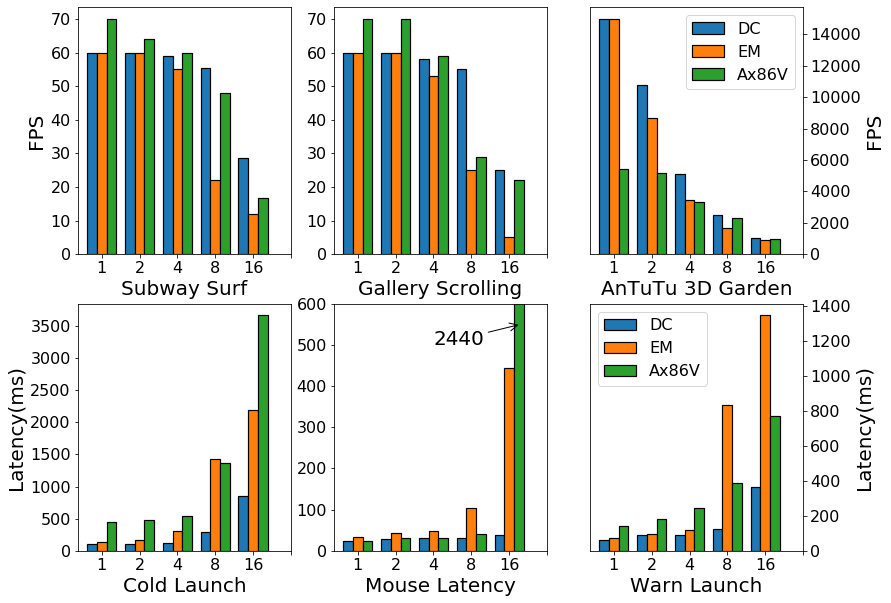

In [9]:
import matplotlib.gridspec as gridspec

FIGURE2_LEFT_DATA_SHEET_NAME = "Figure2_left"
FIGURE2_RIGHT_DATA_SHEET_NAME = "Figure2_right"
FIGURE2_LEFT_TEXT = "                                 Frame Rate with Clients"
FIGURE2_RIGHT_TEXT = "Latency with Clients"
HATCHES = ['','','=']
left_data = pd.read_excel(DATAPATH, FIGURE2_LEFT_DATA_SHEET_NAME, index_col = 0)
right_data = pd.read_excel(DATAPATH, FIGURE2_RIGHT_DATA_SHEET_NAME, index_col = 0)

fig = plt.figure(figsize=(13,10))
width = 0.13
N = 5
Nindex =  np.arange(N)

LEFTLABELS = ["DC-SS","EM-SS","Ax86-SS","DC-GF","EM-GF","Ax86-GF","DC-ATT","EM-ATT","Ax86-ATT"]
RIGHTLABELS = ["DC-Mouse","EM-Mouse","Ax86-Mouse","DC-CL","EM-CL","Ax86-CL","DC_WL","EM-WL","Ax86-WL"]
LABELS = ["DC","EM","Ax86V"]

gs0 = gridspec.GridSpec(2, 1, figure=fig)

gs00 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0])

ax1 = fig.add_subplot(gs00[:, :1])

for (i,row_index) in zip(np.arange(3),left_data.index[0:3]):
    ax1.bar(Nindex + 1 + width * 2 * (i - 1), left_data.loc[row_index], width * 2, linewidth=1.2, edgecolor="black", label = LABELS[i],hatch=HATCHES[i])
ax1.set_xticks([1,2,3,4,5,6])
ax1.set_xticklabels(['1','2','4','8','16'])
ax1.set_xlabel("Subway Surf",fontsize=20)
    
ax1_3 = fig.add_subplot(gs00[:,1])
for (i,row_index) in zip(np.arange(3,6),left_data.index[3:6]):
    ax1_3.bar(Nindex + 1 + width * 2 * (i - 4), left_data.loc[row_index], width * 2, linewidth=1.2, edgecolor="black", label = LABELS[i-3],hatch=HATCHES[i-3])
ax1_3.set_xticks([1,2,3,4,5,6])
ax1_3.set_xticklabels(['1','2','4','8','16'])
ax1_3.set_xlabel("Gallery Scrolling",fontsize=20)

ax1_2 = fig.add_subplot(gs00[:,2:])
ax1_2.yaxis.tick_right()
ax1_2.yaxis.set_label_position("right")
for (i,row_index) in zip(np.arange(6,9),left_data.index[6:]):
    ax1_2.bar(Nindex + 1 + width * 2 * (i - 7), left_data.loc[row_index], width * 2, linewidth=1.2, edgecolor="black", label = LABELS[i-6],hatch=HATCHES[i-6])
ax1_2.set_xticks([1,2,3,4,5,6])
ax1_2.set_xticklabels(['1','2','4','8','16'])
ax1_2.set_xlabel("AnTuTu 3D Garden",fontsize=20)
ax1_2.set_ylabel("FPS", fontsize=20)
# ax1_2.legend(frameon=False)
ax1.set_ylabel("FPS",fontsize=20)


COLORS = []
gs01 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[1])
ax2 = fig.add_subplot(gs01[:, 1:2])
# ax2 = fig.add_subplot(175)
# ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("left")
for (i,row_index) in zip(np.arange(3),right_data.index[0:3]):
    ax2.bar(Nindex + 1 + width * 2 *(i - 1), right_data.loc[row_index], width * 2, linewidth=1.2, edgecolor="black", label = LABELS[i], hatch=HATCHES[i-0])
ax2.set_xticklabels(['0','1','2','4','8','16'])
ax2.set_xticks([1,2,3,4,5,6])
ax2.set_ylim(top=600)
ax2.set_xticklabels(['1','2','4','8','16'])
ax2.annotate("2440", xy=(5.3, 550),xytext=(3, 500),fontsize=20,arrowprops=dict(arrowstyle="->", color='black'))

ax2_2 = fig.add_subplot(gs01[:, :1])
ax2_2.yaxis.set_label_position("left")
for (i,row_index) in zip(np.arange(3,6),right_data.index[3:6]):
    ax2_2.bar(Nindex + 1 + width * 2 *(i - 4), right_data.loc[row_index], width * 2, linewidth=1.2, edgecolor="black", label = LABELS[i-3], hatch=HATCHES[i-3])
ax2_2.set_xticklabels(['0','1','2','4','8','16'])
ax2_2.set_xticks([1,2,3,4,5,6])
ax2_2.set_xticklabels(['1','2','4','8','16'])

ax2_3 = fig.add_subplot(gs01[:, 2:3])
ax2_3.yaxis.set_label_position("left")
for (i,row_index) in zip(np.arange(6,9),right_data.index[6:9]):
    ax2_3.bar(Nindex + 1 + width * 2 *(i - 7), right_data.loc[row_index], width * 2, linewidth=1.2, edgecolor="black", label = LABELS[i-6], hatch=HATCHES[i-6])
ax2_3.set_xticklabels(['0','1','2','4','8','16'])
ax2_3.set_xticks([1,2,3,4,5,6])
ax2_3.set_xticklabels(['1','2','4','8','16'])


ax2.set_xlabel("Mouse Latency",fontsize=20)
ax2_2.set_ylabel("Latency(ms)",fontsize=20)

ax2_2.set_xlabel("Cold Launch",fontsize=20)

ax2_3.set_xlabel("Warn Launch",fontsize=20)
ax2_3.yaxis.tick_right()
ax2_3.yaxis.set_label_position("right")
ax2_3.set_ylabel("Latency(ms)",fontsize=20)

ax2_3.legend(frameon=True,fontsize=16)
ax1_2.legend(frameon=True,fontsize=16)

axes = [ax1,ax1_2,ax1_3,ax2,ax2_2,ax2_3]
labels =  ax1.get_xticklabels() +  ax1.get_yticklabels()
for ax in axes:
    labels += ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontsize(16) for label in labels]

name = "Figure 2 - Multiple Instance QoS in Small Scaling Scenario"
name = name.replace('.','')
fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')



# Droid-Cloud (Mouse Latency (ms))
# Emulator (Mouse Latency (ms))
# Android x86 Qemu (Mouse Latency (ms))
# Droid-Cloud (Cold Launch of App (ms))
# Emulator (Cold Launch of App (ms))
# Android x86 Qemu (Cold Launch of App (ms))
# Droid-Cloud (Warm Launch of App (ms))
# Emulator (Warm Launch of App (ms))
# Android x86 Qemu (Warm Launch of App (ms))


In [17]:
?ax1.annotate

## Figure 3 - Resource Cost in Small Scaling Scenario of Subway Surf

In [10]:
FIGURE3_LEFT_DATA_SHEET_NAME = "Figure3_left"
FIGURE3_RIGHT_DATA_SHEET_NAME = "Figure3_right_test"
FIGURE3_LEFT_TEXT = " Total Cost and FPS"
FIGURE3_RIGHT_TEXT = "Per Instance Cost\n(Memory and Disk utilization,per instance;\nCPU and GPU utilization: per instance and per frame)"

In [11]:
left_data = pd.read_excel(DATAPATH, FIGURE3_LEFT_DATA_SHEET_NAME, index_col = 0) * 100
right_data = pd.read_excel(DATAPATH, FIGURE3_RIGHT_DATA_SHEET_NAME, index_col = 0) * 100

In [12]:
right_data

,1,2,4,8,16
Droid-Cloud (CPU%)*,0.121333,0.109917,0.118078,0.164847,0.178985
Droid-Cloud (GPU%)*,0.183333,0.133333,0.135478,0.168592,0.197735
Droid-Cloud (MEM%)**,95.148026,51.850329,31.229441,21.700247,17.166941
Droid-Cloud (Disk Size%)**,35.612245,13.775510,17.091837,5.076531,3.061224
Emulator (CPU%)*,0.270167,0.263750,0.364455,0.529545,0.496094
Emulator (GPU%)*,0.189333,0.209167,0.275591,0.296989,0.229167
Emulator (MEM%)**,117.351974,72.532895,59.272204,52.559622,48.288446
Emulator (Disk Size%),129.591837,139.795918,188.571429,90.854592,110.076531
Android x86 Qemu (CPU%)*,0.129857,0.134453,0.139458,0.222187,0.343336
Android x86 Qemu (GPU%)*,0.071429,0.062500,0.067792,0.079766,0.075640


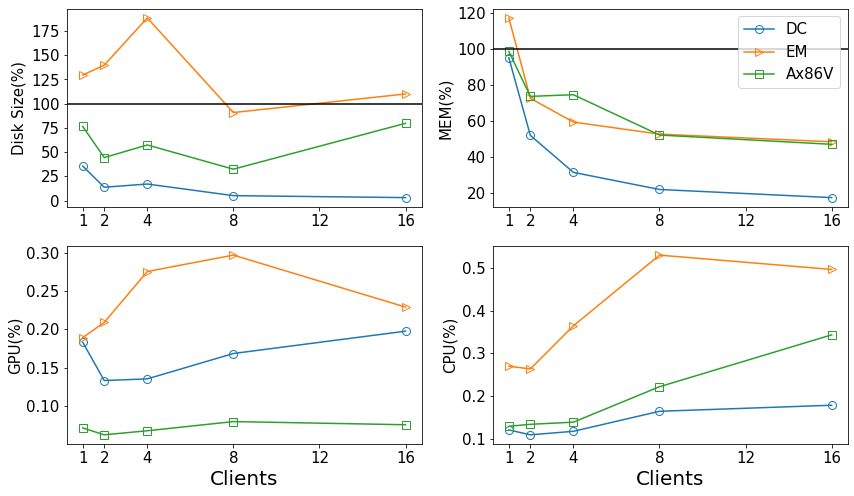

In [34]:
STRIP = 4
M = 3
N = 4
fig = plt.figure(figsize=(14,8))

MARKERS= ['o','>','s']
# Droid-Cloud (CPU%)
# Droid-Cloud (GPU%)
# Droid-Cloud (MEM%)
# Droid-Cloud (Disk Size%)
# Emulator (CPU%)
# Emulator (GPU%)
# Emulator (MEM%)
# Emulator (Disk Size%)
# Android x86 Qemu (CPU%)
# Android x86 Qemu (GPU%)
# Android x86 Qemu (MEM%)
# Android x86 Qemu (Disk Size%)

LABELS = ['DC', 'EM', 'Ax86V']
SUBLABELS = ["CPU","GPU","MEM","Disk Size"]

## Left figure
# ax1 = fig.add_subplot(427)
# ax1.set_xticks([1,2,4,8,12,16])
# ax1.set_xlabel(FIGURE3_LEFT_TEXT,fontsize=15)

# ax2 = fig.add_subplot(425,sharex=ax1)
# ax3 = fig.add_subplot(423,sharex=ax1)
# ax4 = fig.add_subplot(421,sharex=ax1)
# axes_left = [ax1,ax2,ax3,ax4]


# labels = ax1.get_xticklabels()


# for j in range(N):
#     for i in range(M):
#         axes_left[j].plot(left_data.loc[left_data.index[i * N + j]],marker=MARKERS[i],markersize=8,label=LABELS[i],markerfacecolor="none")
#     axes_left[j].set_ylabel(SUBLABELS[j] + "(%)",fontsize=13)
# #     axes_left[j].grid(ls='--',color="black")
#     labels += axes_left[j].get_yticklabels()
# ax1.legend(frameon=True,loc="lower right",ncol=3)

ax5 = fig.add_subplot(224)
ax5.set_xticks([1,2,4,8,12,16])
# ax5.set_xlabel(FIGURE3_RIGHT_TEXT,fontsize=15)

# ax5.set_xticks()
ax6 = fig.add_subplot(223,sharex=ax5)
ax7 = fig.add_subplot(222,sharex=ax5)
ax8 = fig.add_subplot(221,sharex=ax5)
axes_right = [ax5,ax6,ax7,ax8]
# [ax.yaxis.set_label_position("right") for ax in axes_right]
# [ax.yaxis.tick_right() for ax in axes_right]

labels += ax5.get_xticklabels()

for j in range(N):
    for i in range(M):
        axes_right[j].plot(right_data.loc[right_data.index[i * 4 + j]],marker=MARKERS[i],markersize=8,markerfacecolor="none",label=LABELS[i])
    axes_right[j].set_ylabel(SUBLABELS[j] + "(%)",fontsize=15)
#     axes_right[j].grid(ls='--',color="black")
    labels += axes_right[j].get_yticklabels() + axes_right[j].get_xticklabels()
    
##
# ax1.set_yticks([0,25,50,75,100])
# ax2.set_yticks([0,25,50,75,100])
# ax3.set_yticks([0,25,50,75,100])
# ax4.set_yticks([0,5,10,15,20])
# ax5.set_yticks(np.arange(0,0.7,0.1))
# ax6.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
# ax7.set_yticks(np.arange(0,18,2))
# ax8.set_yticks([0,0.5,1.0,1.5,2.0])
##

ax7.axhline(y=100,color="black",ls="-")
ax8.axhline(y=100,color="black",ls="-")

ax5.set_xlabel("Clients",fontsize=20)
ax6.set_xlabel("Clients",fontsize=20)


# plt.setp(ax6.get_xticklabels(), visible=False)
# plt.setp(ax7.get_xticklabels(), visible=False)
# plt.setp(ax8.get_xticklabels(), visible=False)

[label.set_fontsize(15) for label in labels]
ax7.legend(fontsize=15)

name = "Figure 3 - Resource Cost in Small Scaling Scenario of Subway Surf"
name = name.replace('.','')
fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')

In [14]:
right_data

,1,2,4,8,16
Droid-Cloud (CPU%)*,0.121333,0.109917,0.118078,0.164847,0.178985
Droid-Cloud (GPU%)*,0.183333,0.133333,0.135478,0.168592,0.197735
Droid-Cloud (MEM%)**,95.148026,51.850329,31.229441,21.700247,17.166941
Droid-Cloud (Disk Size%)**,35.612245,13.775510,17.091837,5.076531,3.061224
Emulator (CPU%)*,0.270167,0.263750,0.364455,0.529545,0.496094
Emulator (GPU%)*,0.189333,0.209167,0.275591,0.296989,0.229167
Emulator (MEM%)**,117.351974,72.532895,59.272204,52.559622,48.288446
Emulator (Disk Size%),129.591837,139.795918,188.571429,90.854592,110.076531
Android x86 Qemu (CPU%)*,0.129857,0.134453,0.139458,0.222187,0.343336
Android x86 Qemu (GPU%)*,0.071429,0.062500,0.067792,0.079766,0.075640


## Figure 3 Total cost and FPS

In [15]:
FIGURE3_FPS_DATA_SHEET_NAME = "Figure3_fps"
data = pd.read_excel(DATAPATH, FIGURE3_FPS_DATA_SHEET_NAME, index_col = 0)
data

,1,2,4,8,16
Droid-Cloud (Subway Surf),60.0,60.0,59.99,51.26,22.0
Emulator (Subway Surf),60.0,60.0,55.00,22.00,12.0
Android x86 Qemu (Subway Surf),NaN,NaN,NaN,NaN,NaN


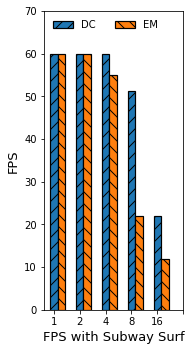

In [16]:
fig = plt.figure(figsize=(2.5,5.5))
ax1 = fig.add_subplot(111)
width = 0.3
HATCHES = ['//','\\\\','||']
LABELS = ["DC","EM","Ax86"]
ax1.set_ylim(top=70)
for i in range(2):
    ax1.bar(np.arange(5)+ width * (i),data.loc[data.index[i]],width,hatch=HATCHES[i],linewidth=1.2, edgecolor="black",label=LABELS[i])
ax1.legend(frameon=False,ncol=2,loc="upper left")
ax1.set_xticks([0,1,2,3,4,5])
ax1.set_xticklabels(['1','2','4','8','16'])
ax1.set_xlabel("FPS with Subway Surf",fontsize=13)
ax1.set_ylabel("FPS",fontsize=13)
name = "Figure 3_fps - Resource Cost in Small Scaling Scenario of Subway Surf" + str(time.time())
name = name.replace('.','')
# fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')

## Figure 4  QoS and Total Resource Cost of Remote Rendering Architecture

In [36]:
FIGURE4_SHEET_NAME = "Figure4"
data = pd.read_excel(DATAPATH, FIGURE4_SHEET_NAME, index_col = 0)

In [37]:
data.columns

Int64Index([1, 2, 4, 8, 16, 32], dtype='int64')

<Figure size 288x288 with 0 Axes>

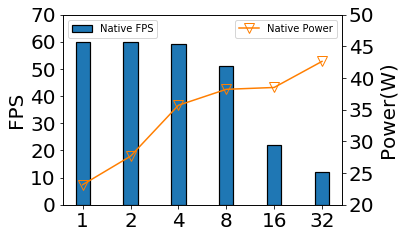

In [38]:
fig = plt.figure(figsize=(4,4))
N = 6
M = 3
fig = plt.figure(figsize=(5,3.5))
# ax1 = fig.add_subplot(122)
COLORS = []
width = 0.3
N = 4
HATCHES = ['','','||']
NIndex1 = np.arange(0,6)
Nindex =  np.arange(N)
MARKERS= ['o','>','s']
LABELS = ['Native', 'DroidCloud','RR-Stub']
# ax1.set_xscale('log')
# for i in range(M-2):
# #     ax1.bar(NIndex1 + width * i,width=width,hatch=HATCHES[i],linewidth=1.2, color="#FF7F01",edgecolor="black", height=data.loc[data.index[i]],label=LABELS[i])
#     ax1.bar(NIndex1 + width * (i - 1), data.loc[data.index[i]], width,label=data.index[i], color="#FF7F01",linewidth=1.2,edgecolor="black")
# ax1.set_xticks(NIndex1)
# ax1.set_xticklabels(['1','2','4','8','16','32'],fontsize=20)
# # ax1.grid(ls="--",color="black")
# # ax1.set_yticklabels(np.arange(10,90,10),fontsize=20)
# ax1.set_xlabel("Clients",fontsize=20)
# ax1.set_ylabel("FPS",fontsize=20)

ax2=fig.add_subplot(111)
axt = ax2.twinx()
# ax2.set_xscale('log')
for i in range(M-2):
#     ax2.plot(np.arange(0,6,1),data.loc[data.index[i]],marker=MARKERS[i],markersize=10,markerfacecolor="none",color="#FF7F01",label="Native")
    axt.plot(np.arange(0,6,1),data.loc[data.index[i+M]],marker='v',markersize=10,color="#FF7F01",markerfacecolor="none",label="Native Power")
    ax2.bar(NIndex1 + width * (i), width = width,height=data.loc[data.index[i]], hatch=HATCHES[i],label="Native FPS",edgecolor="black",linewidth=1.2)
ax2.set_xticks(NIndex1)
ax2.set_xticklabels(['1','2','4','8','16','32'],fontsize=20)
# ax2.set_yticklabels(np.arange(10,90,10),fontsize=13)
# ax2.grid(ls="--",color="black")
# ax2.set_xlabel("Clients",fontsize=20)
ax2.set_ylabel("FPS",fontsize=20)


axt.set_ylabel("Power(W)",fontsize=20)
# ax2.legend(frameon=True,fontsize=16, loc="upper left")
# ax2.legend(frameon=True,fontsize=20)


ax2.set_ylim(top=70)
axt.set_ylim(top=50,bottom=20)
axt.legend(loc="upper right")
ax2.legend(loc="upper left")
# for (i,rowLabel) in zip(np.arange(4), left_data.index):
#     ax1.bar(Nindex + 1 + width * (i - 1.5),left_data[left_data.columns[i]], width, linewidth=1.2,edgecolor="black")
# ax1.set_xticks(Nindex + 1)
# ax1.set_xticklabels(left_data.index,rotation = 0, fontsize=13)
# ax1.set_xlabel(FIGURE1_LEFT_TEXT,fontsize=15)
# ax1.set_yticks(np.arange(0,0.3,0.05))
# ax1.set_yticklabels(['0','5','10','15','20','25'],fontsize=13)
# ax1.set_ylabel("Utilization Rate(%)",fontsize=15)
# ax1.legend(left_data.columns,ncol=1,frameon=False, fontsize=12)
labels = ax1.get_yticklabels() + ax2.get_yticklabels() + axt.get_yticklabels()
[label.set_fontsize(20) for label in labels]
name = "Figure 0 - Native Motivation"
# name = name.replace('.','')
fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')

In [39]:
?ax2.set_ylim

<Figure size 288x288 with 0 Axes>

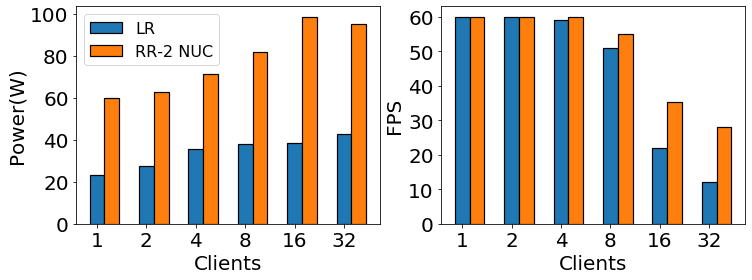

In [40]:
fig = plt.figure(figsize=(4,4))
N = 6
M = 3
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(122)
COLORS = []
width = 0.3
N = 4
HATCHES = ['','','||']
NIndex1 = np.arange(0,6)
Nindex =  np.arange(N)
MARKERS= ['o','>','s']
LABELS = ['LR', 'RR-2 NUC','RR-Stub']
# ax1.set_xscale('log')
for i in range(M-1):
    ax1.bar(NIndex1 + width * i,width=width,hatch=HATCHES[i],linewidth=1.2, edgecolor="black", height=data.loc[data.index[i]],label=LABELS[i])
#     ax1.bar(NIndex1 + width * (i - 1), data.loc[data.index[i]], width,label=data.index[i], linewidth=1.2,edgecolor="black")
ax1.set_xticks(NIndex1)
ax1.set_xticklabels(['1','2','4','8','16','32'],fontsize=20)
# ax1.grid(ls="--",color="black")
# ax1.set_yticklabels(np.arange(10,90,10),fontsize=20)
ax1.set_xlabel("Clients",fontsize=20)
ax1.set_ylabel("FPS",fontsize=20)

ax2=fig.add_subplot(121)
# ax2.set_xscale('log')
for i in range(M-1):
#     ax2.plot(data.loc[data.index[i+M]],marker=MARKERS[i],markersize=10,markerfacecolor="none",label=LABELS[i])
    ax2.bar(NIndex1 + width * (i), width = width, height=data.loc[data.index[i+M]], hatch=HATCHES[i],label=LABELS[i],edgecolor="black",linewidth=1.2)
ax2.set_xticks(NIndex1)
ax2.set_xticklabels(['1','2','4','8','16','32'],fontsize=20)
# ax2.set_yticklabels(np.arange(10,90,10),fontsize=13)
# ax2.grid(ls="--",color="black")
ax2.set_xlabel("Clients",fontsize=20)
ax2.set_ylabel("Power(W)",fontsize=20)
ax2.legend(frameon=True,fontsize=16, loc="upper left")
# ax2.legend(frameon=True,fontsize=20)


# for (i,rowLabel) in zip(np.arange(4), left_data.index):
#     ax1.bar(Nindex + 1 + width * (i - 1.5),left_data[left_data.columns[i]], width, linewidth=1.2,edgecolor="black")
# ax1.set_xticks(Nindex + 1)
# ax1.set_xticklabels(left_data.index,rotation = 0, fontsize=13)
# ax1.set_xlabel(FIGURE1_LEFT_TEXT,fontsize=15)
# ax1.set_yticks(np.arange(0,0.3,0.05))
# ax1.set_yticklabels(['0','5','10','15','20','25'],fontsize=13)
# ax1.set_ylabel("Utilization Rate(%)",fontsize=15)
# ax1.legend(left_data.columns,ncol=1,frameon=False, fontsize=12)
labels = ax1.get_yticklabels() + ax2.get_yticklabels()
[label.set_fontsize(20) for label in labels]
name = "Figure 4 - QoS and Total Resource Cost of Remote Rendering Architecture.pdf"
name = name.replace('.','')
fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')

<Figure size 288x288 with 0 Axes>

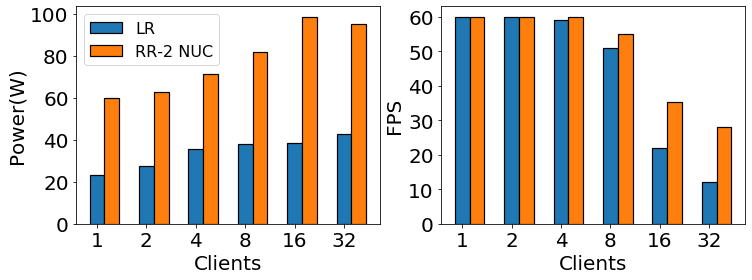

In [43]:
fig = plt.figure(figsize=(4,4))
N = 6
M = 3
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(122)
COLORS = []
width = 0.3
N = 4
HATCHES = ['','','||']
NIndex1 = np.arange(0,6)
Nindex =  np.arange(N)
MARKERS= ['o','>','s']
LABELS = ['LR', 'RR-2 NUC','RR-Stub']
# ax1.set_xscale('log')
for i in range(M-1):
    ax1.bar(NIndex1 + width * i,width=width,hatch=HATCHES[i],linewidth=1.2, edgecolor="black", height=data.loc[data.index[i]],label=LABELS[i])
#     ax1.bar(NIndex1 + width * (i), width = width, height=data.loc[data.index[i+M]], hatch=HATCHES[i],label=LABELS[i],edgecolor="black",linewidth=1.2)
    #     ax1.bar(NIndex1 + width * (i - 1), data.loc[data.index[i]], width,label=data.index[i], linewidth=1.2,edgecolor="black")
ax1.set_xticks(NIndex1)
ax1.set_xticklabels(['1','2','4','8','16','32'],fontsize=20)
# ax1.grid(ls="--",color="black")
# ax1.set_yticklabels(np.arange(10,90,10),fontsize=20)
ax1.set_xlabel("Clients",fontsize=20)
ax1.set_ylabel("FPS",fontsize=20)

ax2=fig.add_subplot(121)
# ax2.set_xscale('log')
for i in range(M-1):
#     ax2.plot(data.loc[data.index[i+M]],marker=MARKERS[i],markersize=10,markerfacecolor="none",label=LABELS[i])
    ax2.bar(NIndex1 + width * (i), width = width, height=data.loc[data.index[i+M]], hatch=HATCHES[i],label=LABELS[i],edgecolor="black",linewidth=1.2)
ax2.set_xticks(NIndex1)
ax2.set_xticklabels(['1','2','4','8','16','32'],fontsize=20)
# ax2.set_yticklabels(np.arange(10,90,10),fontsize=13)
# ax2.grid(ls="--",color="black")
ax2.set_xlabel("Clients",fontsize=20)
ax2.set_ylabel("Power(W)",fontsize=20)
ax2.legend(frameon=True,fontsize=16, loc="upper left")
# ax2.legend(frameon=True,fontsize=20)


# for (i,rowLabel) in zip(np.arange(4), left_data.index):
#     ax1.bar(Nindex + 1 + width * (i - 1.5),left_data[left_data.columns[i]], width, linewidth=1.2,edgecolor="black")
# ax1.set_xticks(Nindex + 1)
# ax1.set_xticklabels(left_data.index,rotation = 0, fontsize=13)
# ax1.set_xlabel(FIGURE1_LEFT_TEXT,fontsize=15)
# ax1.set_yticks(np.arange(0,0.3,0.05))
# ax1.set_yticklabels(['0','5','10','15','20','25'],fontsize=13)
# ax1.set_ylabel("Utilization Rate(%)",fontsize=15)
# ax1.legend(left_data.columns,ncol=1,frameon=False, fontsize=12)
labels = ax1.get_yticklabels() + ax2.get_yticklabels()
[label.set_fontsize(20) for label in labels]
name = "Figure 4 - QoS and Total Resource Cost of Remote Rendering Architecture.pdf"
name = name.replace('.','')
fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')

## Figure 5  - QoS of Droid Cloud in Large Scaling Scenario Subway Surf
- [ ] Fake Data

In [23]:
FIGURE5_SHEET_NAME = "Figure5"
data = pd.read_excel(DATAPATH, FIGURE5_SHEET_NAME, index_col = 0)

In [24]:
data

,0.010417,0.052083,0.104167,0.156250,0.312500,0.468750,0.937500
Droid Cloud Reverted Optimization (FPS),60,60,60,41.88,40.07,38.21,36.21
Droid Cloud (FPS),60,60,60,42.35,41.92,40.36,39.96
Droid Cloud Render into Stub (FPS),60,60,60,60.00,60.00,60.00,60.00
Droid Cloud Reverted Optimization (Mouse Latency (ms)),21,22,22,25.00,25.00,29.00,29.00
Droid Cloud (Mouse Latency (ms)),25,30,31,34.00,34.00,36.00,38.00


In [25]:
# XTICKS=np.array([15,30,45,60,90,120,150,180]) / 96
XTICKS = [0,0.01,0.05,0.10,0.16,0.31,0.47,0.94]
# XTICKS = [0, 0.16,0.31,0.47,0.63,0.94,1.25,1.56,1.87]
XTICKS

[0, 0.01, 0.05, 0.1, 0.16, 0.31, 0.47, 0.94]

<Figure size 576x288 with 0 Axes>

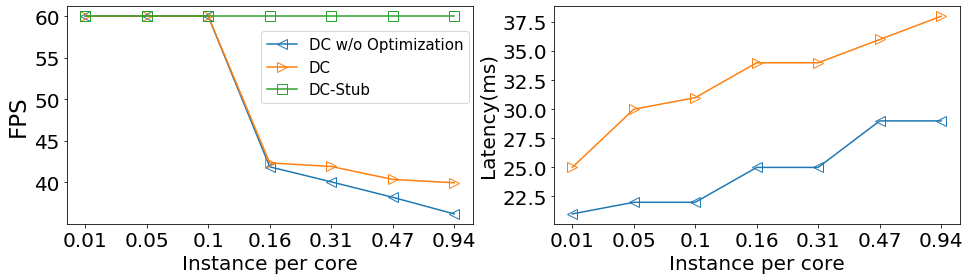

In [26]:
fig = plt.figure(figsize=(8,4))
N = 6
M = 3
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
COLORS = []
width = 0.25
N = 4
NIndex1 = np.arange(0,6)
Nindex =  np.arange(N)
MARKERS= ['<','>','s']

LABELS = ['DC w/o Optimization', 'DC','DC-Stub']
for i in range(M):
    ax1.plot(np.arange(1,8,1),data.loc[data.index[i]],marker=MARKERS[i],markersize=10,markerfacecolor="none",label=LABELS[i])
#     ax1.bar(NIndex1 + width * (i - 1), data.loc[data.index[i]], width,label=data.index[i], linewidth=1.2,edgecolor="black")
# ax1.set_xticks(XTICKS)
ax1.set_xticklabels(XTICKS,fontsize=20)
# ax1.grid(ls="--",color="black")
# ax1.set_yticklabels(np.arange(10,90,10),fontsize=15)
ax1.set_xlabel("Instance per core",fontsize=20)
ax1.set_ylabel("FPS",fontsize=23)
ax1.legend(frameon=True,fontsize=15,loc="upper right",bbox_to_anchor=(0.01, 0.8, 1.0, .12))
# ax1.set_title("Fake Data")

ax2=fig.add_subplot(122)
for i in range(M - 1):
    ax2.plot(np.arange(1,8,1),data.loc[data.index[i+M]],marker=MARKERS[i],markersize=10,markerfacecolor="none",label=LABELS[i])
#     ax1.bar(NIndex1 + width * (i - 1), data.loc[data.index[i]], width,label=data.index[i], linewidth=1.2,edgecolor="black")
# ax2.set_xticks(XTICKS)
ax2.set_xticklabels(XTICKS,fontsize=20)
# ax2.set_yticklabels(np.arange(10,90,10),fontsize=15)
# ax2.grid(ls="--",color="black")
ax2.set_xlabel("Instance per core",fontsize=20)
ax2.set_ylabel("Latency(ms)",fontsize=20)

# ax2.set_yticklabels(ax2.get_yticklabels(),fontsize=15)
# ax2.legend(frameon=False,fontsize=15,loc="lower right")

# Droid Cloud Reverted Optimization (FPS)
# Droid Cloud (FPS)
# Droid Cloud Render into Stub (FPS)
# Droid Cloud Reverted Optimization (Mouse Latency (ms))
# Droid Cloud (Mouse Latency (ms))
# Droid Cloud Render into Stub (Mouse Latency (ms))

labels = ax2.get_yticklabels() + ax1.get_yticklabels()
[label.set_fontsize(20) for label in labels]

name = "Figure 5 - QoS of Droid Cloud in Large Scaling Scenario Subway Surf"
name = name.replace('.','')
fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')

## Figure 6  Total Resource Utilization Rate of Large Scaling Scenario Subway Surf

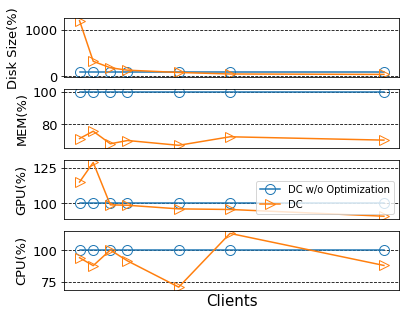

In [27]:
FIGURE6_SHEET_NAME = "Figure6newnormalized"
data = pd.read_excel(DATAPATH, FIGURE6_SHEET_NAME, index_col = 0)

# Transform data
data = data * 100
data

M = 2
N = 4
fig = plt.figure(figsize=(6,5))

MARKERS= ['o','>','s']
LABELS = ['DC w/o Optimization', 'DC']
SUBLABELS = ["CPU","GPU","MEM","Disk Size"]

ax1 = fig.add_subplot(414)
ax1.set_xticks([15,30,45,60,90,120,150,180])

ax2 = fig.add_subplot(413,sharex=ax1)
ax3 = fig.add_subplot(412,sharex=ax1)
ax4 = fig.add_subplot(411,sharex=ax1)
axes = [ax1,ax2,ax3,ax4]
labels = ax1.get_xticklabels()
for j in range(N):
    for i in range(M):
        axes[j].plot(data.loc[data.index[i + j*2]],marker=MARKERS[i],markersize=10,markerfacecolor="none",label=LABELS[i])
    axes[j].set_ylabel(SUBLABELS[j] + "(%)",fontsize=13)
    axes[j].grid(ls='--',color="black")
    labels += axes[j].get_yticklabels()
ax2.legend(frameon=True,loc="lower right")

##
# ax1.set_yticks([0,25,50])
# ax2.set_yticks([25,50,75,100])
# ax3.set_yticks([0,25,50,75])
# ax4.set_yticks([0,2,4,6,8,10])
##

plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

[label.set_fontsize(13) for label in labels]

ax1.set_xlabel("Clients",fontsize=15)

name = "Figure 6_fps Total Resource Utilization Rate of Large Scaling Scenario Subway Surf" 
name = name.replace('.','')
# fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')

## Figure 6 Total Resource Utilization Rate of Large Scaling Scenario Subway Surf With CPU/FPS GPU/FPS

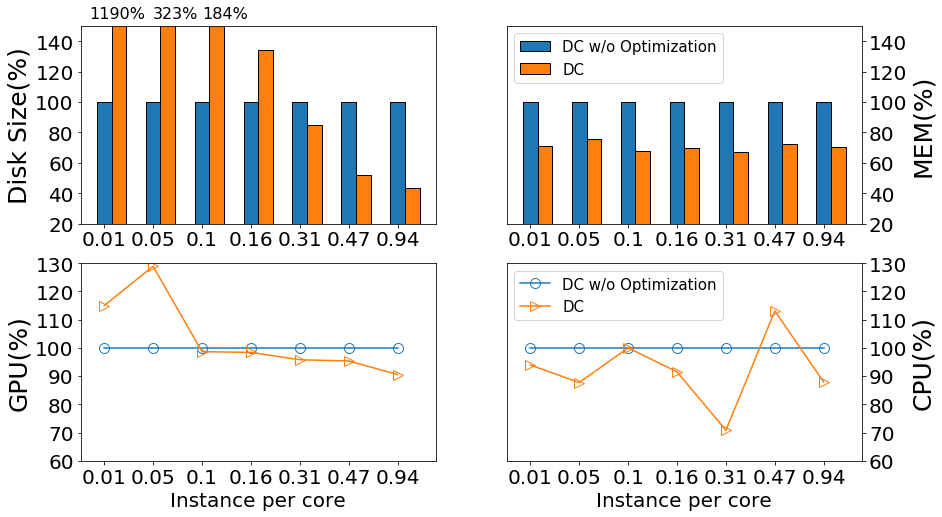

In [28]:
FIGURE6_SHEET_NAME = "Figure6newnormalized"
data = pd.read_excel(DATAPATH, FIGURE6_SHEET_NAME, index_col = 0)

# Transform data
data = data * 100
data

M = 2
N = 4
fig = plt.figure(figsize=(14,8))

MARKERS= ['o','>','s']
LABELS = ['DC w/o Optimization', 'DC']
SUBLABELS = ["CPU","GPU","MEM","Disk Size"]

ax1 = fig.add_subplot(224)

ax1.set_xticklabels(XTICKS,fontsize=20)

ax2 = fig.add_subplot(223,sharex=ax1)
ax3 = fig.add_subplot(222,sharex=ax1)
ax4 = fig.add_subplot(221,sharex=ax1)
axes = [ax1,ax2,ax3,ax4]
labels = ax1.get_xticklabels()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
HATCHES = ['','','||']
# LABELS = ["DC","EM","Ax86"]
# ax1.set_ylim(top=70)
# for i in range(2):
#     ax1.bar(np.arange(5)+ width * (i),data.loc[data.index[i]],width,hatch=HATCHES[i],linewidth=1.2, edgecolor="black",label=LABELS[i])
width = 0.3
for j in range(N):
    if(j == 3 or j == 2):
        for i in range(M):
            axes[j].bar(np.arange(1,8,1) + i * width, data.loc[data.index[i+j*2]],hatch=HATCHES[i],width=width,edgecolor="black",label=LABELS[i])
    elif (j == 1 or j == 0):
        for i in range(M):
            axes[j].plot(np.arange(1,8,1),data.loc[data.index[i + j*2]],marker=MARKERS[i],markersize=10,markerfacecolor="none",label=LABELS[i])
    axes[j].set_ylabel(SUBLABELS[j] + "(%)",fontsize=25)
#     axes[j].grid(ls='--',color="black")
    labels += axes[j].get_yticklabels() + axes[j].get_xticklabels()
# ax1.legend(frameon=True,loc="center right",fontsize=15,bbox_to_anchor=(0.6,0.4,0.4,0.3))
ax1.legend(frameon=True,loc="upper left",fontsize=15)
ax3.legend(frameon=True,loc="upper left",fontsize=15)



##
# ax1.set_yticks([0,0.01,0.02,0.03,0.04,0.05])
# ax2.set_yticks([0,2,4,6])
# ax2.set_yticks([0,0.01,0.02,0.03,0.04,0.05])
# ax3.set_yticks([0,0.2,0.4,0.6,0.8])
# ax3.set_yticklabels(['0','0.20','0.40','0.60','0.80'])
# ax4.set_yticks([0,2,4,6,8,10])
ax1.set_ylim(top=130,bottom=60)
ax2.set_ylim(top=130,bottom=60)

ax3.set_ylim(top=150,bottom=20)
ax4.set_ylim(top=150,bottom=20)

TEXTS = ["1190%","323%","184%"]
ax4.text(x=width+0.4,y=155,s=TEXTS[0],fontsize=16)
ax4.text(x=1.7+width,y=155,s=TEXTS[1],fontsize=16)
ax4.text(x=2.7+width,y=155,s=TEXTS[2],fontsize=16)


##

# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.setp(ax3.get_xticklabels(), visible=False)
# plt.setp(ax4.get_xticklabels(), visible=False)

[label.set_fontsize(20) for label in labels]

ax1.set_xlabel("Instance per core",fontsize=20)
ax2.set_xlabel("Instance per core",fontsize=20)


name = "Figure 6 - Total Resource Utilization Rate of Large Scaling Scenario Subway Surf"
name = name.replace('.','')
fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')

In [29]:
data

,0.010417,0.052083,0.104167,0.156250,0.312500,0.468750,0.937500
Droid Cloud Reverted Optimization (CPU%),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Droid Cloud (CPU%),93.939394,87.704918,100.000000,91.488240,70.828981,113.064821,87.870702
Droid Cloud Reverted Optimization (GPU%),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Droid Cloud (GPU%),114.964029,128.892675,98.647254,98.385040,95.781450,95.358769,90.550485
Droid Cloud Reverted Optimization (MEM%),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Droid Cloud (MEM%),71.038251,75.531915,67.804154,69.823789,66.863556,72.124304,70.065789
Droid Cloud Reverted Optimization (Disk Size%),100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Droid Cloud (Disk Size%),1190.476190,323.255814,184.939759,133.992095,84.901961,51.954242,43.386243
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,1190.000000,323.000000,185.000000,NaN,NaN,NaN,NaN


In [30]:
ax4.text(x=1+width,y=1.01,s="12")

Text(1.3, 1.01, '12')

In [31]:
?ax4.text

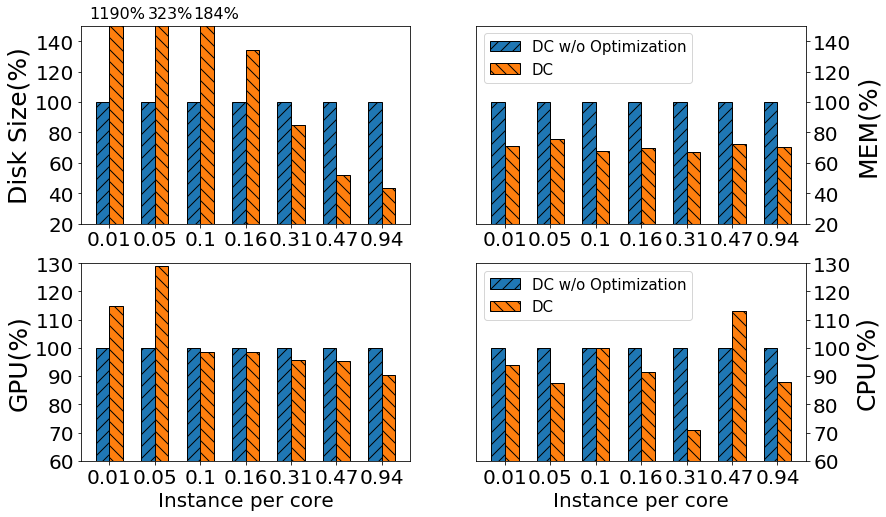

In [32]:
FIGURE6_SHEET_NAME = "Figure6newnormalized"
data = pd.read_excel(DATAPATH, FIGURE6_SHEET_NAME, index_col = 0)

# Transform data
data = data * 100
data

M = 2
N = 4
fig = plt.figure(figsize=(13,8))

MARKERS= ['o','>','s']
LABELS = ['DC w/o Optimization', 'DC']
SUBLABELS = ["CPU","GPU","MEM","Disk Size"]

ax1 = fig.add_subplot(224)

ax1.set_xticklabels(XTICKS,fontsize=20)

ax2 = fig.add_subplot(223,sharex=ax1)
ax3 = fig.add_subplot(222,sharex=ax1)
ax4 = fig.add_subplot(221,sharex=ax1)
axes = [ax1,ax2,ax3,ax4]
labels = ax1.get_xticklabels()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
HATCHES = ['//','\\\\','||']
# LABELS = ["DC","EM","Ax86"]
# ax1.set_ylim(top=70)
# for i in range(2):
#     ax1.bar(np.arange(5)+ width * (i),data.loc[data.index[i]],width,hatch=HATCHES[i],linewidth=1.2, edgecolor="black",label=LABELS[i])
width = 0.3
for j in range(N):
    for i in range(M):
        axes[j].bar(np.arange(1,8,1) + i * width - 0.15, data.loc[data.index[i+j*2]],hatch=HATCHES[i],width=width,edgecolor="black",label=LABELS[i])
    axes[j].set_ylabel(SUBLABELS[j] + "(%)",fontsize=25)
#     axes[j].grid(ls='--',color="black")
    labels += axes[j].get_yticklabels() + axes[j].get_xticklabels()
# ax1.legend(frameon=True,loc="center right",fontsize=15,bbox_to_anchor=(0.6,0.4,0.4,0.3))
ax1.legend(frameon=True,loc="upper left",fontsize=15)
ax3.legend(frameon=True,loc="upper left",fontsize=15)



##
# ax1.set_yticks([0,0.01,0.02,0.03,0.04,0.05])
# ax2.set_yticks([0,2,4,6])
# ax2.set_yticks([0,0.01,0.02,0.03,0.04,0.05])
# ax3.set_yticks([0,0.2,0.4,0.6,0.8])
# ax3.set_yticklabels(['0','0.20','0.40','0.60','0.80'])
# ax4.set_yticks([0,2,4,6,8,10])
ax1.set_ylim(top=130,bottom=60)
ax2.set_ylim(top=130,bottom=60)

ax3.set_ylim(top=150,bottom=20)
ax4.set_ylim(top=150,bottom=20)

TEXTS = ["1190%","323%","184%"]
ax4.text(x=width+0.4 - 0.15,y=155,s=TEXTS[0],fontsize=16)
ax4.text(x=1.7+width - 0.15,y=155,s=TEXTS[1],fontsize=16)
ax4.text(x=2.7+width - 0.15,y=155,s=TEXTS[2],fontsize=16)


##

# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.setp(ax3.get_xticklabels(), visible=False)
# plt.setp(ax4.get_xticklabels(), visible=False)

[label.set_fontsize(20) for label in labels]

ax1.set_xlabel("Instance per core",fontsize=20)
ax2.set_xlabel("Instance per core",fontsize=20)


name = "Figure 6 - Total Resource Utilization Rate of Large Scaling Scenario Subway Surf"
name = name.replace('.','')
# fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')

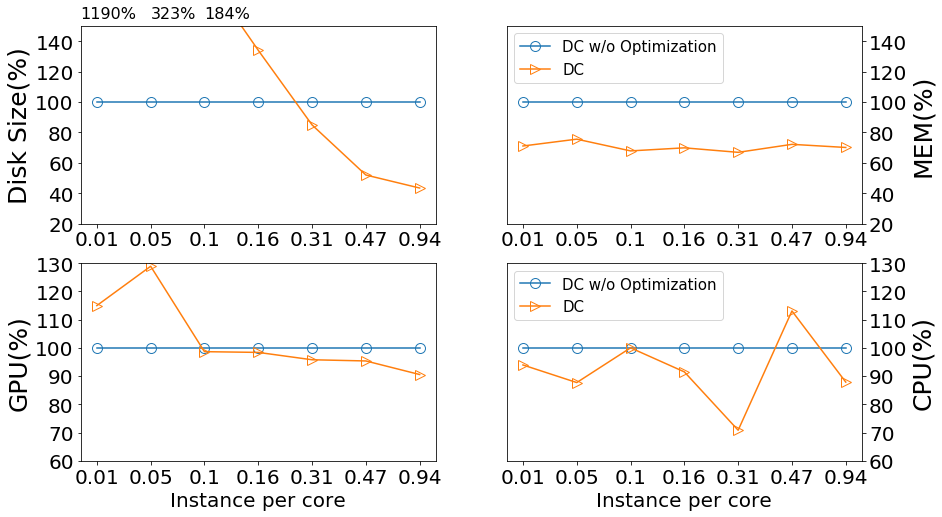

In [33]:
FIGURE6_SHEET_NAME = "Figure6newnormalized"
data = pd.read_excel(DATAPATH, FIGURE6_SHEET_NAME, index_col = 0)

# Transform data
data = data * 100
data

M = 2
N = 4
fig = plt.figure(figsize=(14,8))

MARKERS= ['o','>','s']
LABELS = ['DC w/o Optimization', 'DC']
SUBLABELS = ["CPU","GPU","MEM","Disk Size"]

ax1 = fig.add_subplot(224)

ax1.set_xticklabels(XTICKS,fontsize=20)

ax2 = fig.add_subplot(223,sharex=ax1)
ax3 = fig.add_subplot(222,sharex=ax1)
ax4 = fig.add_subplot(221,sharex=ax1)
axes = [ax1,ax2,ax3,ax4]
labels = ax1.get_xticklabels()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
HATCHES = ['//','\\\\','||']
# LABELS = ["DC","EM","Ax86"]
# ax1.set_ylim(top=70)
# for i in range(2):
#     ax1.bar(np.arange(5)+ width * (i),data.loc[data.index[i]],width,hatch=HATCHES[i],linewidth=1.2, edgecolor="black",label=LABELS[i])
width = 0.3
for j in range(N):
    for i in range(M):
        axes[j].plot(np.arange(1,8,1),data.loc[data.index[i + j*2]],marker=MARKERS[i],markersize=10,markerfacecolor="none",label=LABELS[i])
    axes[j].set_ylabel(SUBLABELS[j] + "(%)",fontsize=25)
#     axes[j].grid(ls='--',color="black")
    labels += axes[j].get_yticklabels() + axes[j].get_xticklabels()
# ax1.legend(frameon=True,loc="center right",fontsize=15,bbox_to_anchor=(0.6,0.4,0.4,0.3))
ax1.legend(frameon=True,loc="upper left",fontsize=15)
ax3.legend(frameon=True,loc="upper left",fontsize=15)



##
# ax1.set_yticks([0,0.01,0.02,0.03,0.04,0.05])
# ax2.set_yticks([0,2,4,6])
# ax2.set_yticks([0,0.01,0.02,0.03,0.04,0.05])
# ax3.set_yticks([0,0.2,0.4,0.6,0.8])
# ax3.set_yticklabels(['0','0.20','0.40','0.60','0.80'])
# ax4.set_yticks([0,2,4,6,8,10])
ax1.set_ylim(top=130,bottom=60)
ax2.set_ylim(top=130,bottom=60)

ax3.set_ylim(top=150,bottom=20)
ax4.set_ylim(top=150,bottom=20)

TEXTS = ["1190%","323%","184%"]
ax4.text(x=width+0.4,y=155,s=TEXTS[0],fontsize=16)
ax4.text(x=1.7+width,y=155,s=TEXTS[1],fontsize=16)
ax4.text(x=2.7+width,y=155,s=TEXTS[2],fontsize=16)


##

# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.setp(ax3.get_xticklabels(), visible=False)
# plt.setp(ax4.get_xticklabels(), visible=False)

[label.set_fontsize(20) for label in labels]

ax1.set_xlabel("Instance per core",fontsize=20)
ax2.set_xlabel("Instance per core",fontsize=20)


name = "Figure 6 - Total Resource Utilization Rate of Large Scaling Scenario Subway Surf"
name = name.replace('.','')
# fig.savefig('./' + name + '.pdf', bbox_inches = 'tight')